In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [31]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [32]:
DATASET = "./Rice/"

images = []
classlist = []
label_list = ['Arborio', 'Ipsala', 'Karacadag']
for i, class_name in enumerate(os.listdir(DATASET)):
    for j, file in enumerate(os.listdir(os.path.join(DATASET, class_name))):
        image = load_img(os.path.join(DATASET, class_name, file))
        # img jadi array
        image = img_to_array(image)
        # buat imgnya jadi grayscale
        image = tf.image.rgb_to_grayscale(image)
        image = image / 255.0
        
        classlist.append(i)
        images.append(image)
        
        print(f'class name = {class_name}, img = {file}')
        if(j == 100):
            break

class name = Arborio, img = Arborio (1).jpg
class name = Arborio, img = Arborio (10).jpg
class name = Arborio, img = Arborio (100).jpg
class name = Arborio, img = Arborio (1000).jpg
class name = Arborio, img = Arborio (10000).jpg
class name = Arborio, img = Arborio (10001).jpg
class name = Arborio, img = Arborio (10002).jpg
class name = Arborio, img = Arborio (10003).jpg
class name = Arborio, img = Arborio (10004).jpg
class name = Arborio, img = Arborio (10005).jpg
class name = Arborio, img = Arborio (10006).jpg
class name = Arborio, img = Arborio (10007).jpg
class name = Arborio, img = Arborio (10008).jpg
class name = Arborio, img = Arborio (10009).jpg
class name = Arborio, img = Arborio (1001).jpg
class name = Arborio, img = Arborio (10010).jpg
class name = Arborio, img = Arborio (10011).jpg
class name = Arborio, img = Arborio (10012).jpg
class name = Arborio, img = Arborio (10013).jpg
class name = Arborio, img = Arborio (10014).jpg
class name = Arborio, img = Arborio (10015).jpg
cla

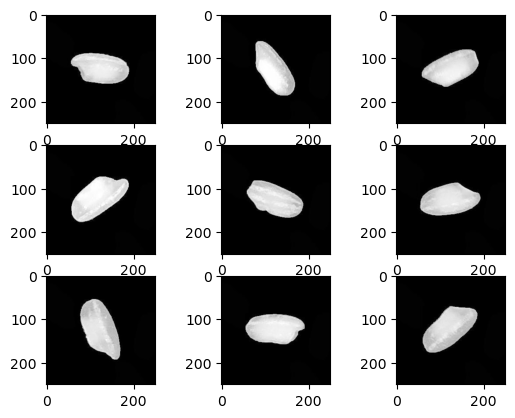

In [33]:
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], 'gray')

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split


In [35]:
images = np.array(images)

y = tf.keras.utils.to_categorical(classlist, num_classes = len(label_list))
x_train, x_test, y_train, y_test = train_test_split(images, y, test_size=0.2, random_state=42)

x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [38]:
model = models.Sequential([
    # layer 1
    layers.Conv2D(32, (3, 3),activation = 'relu', input_shape = (250, 250, 1)), layers.MaxPooling2D((2, 2)),
    # layer 2
    layers.Conv2D(64, (3, 3),activation = 'relu', ), layers.MaxPooling2D((2, 2)),
    # layer 3
    layers.Conv2D(128, (3, 3),activation = 'relu', ), layers.MaxPooling2D((2, 2)),
    # fully connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

c:\Anaconda3\envs\deep_learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 248, 248, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    13,779,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,872,131 (52.92 MB)

 Trainable params: 13,872,131 (52.92 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val), batch_size=32, callbacks=[early_stopping])

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 434ms/step - accuracy: 0.9557 - loss: 0.1205 - val_accuracy: 0.9677 - val_loss: 0.0642
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 427ms/step - accuracy: 0.9746 - loss: 0.0608 - val_accuracy: 1.0000 - val_loss: 0.0379
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 430ms/step - accuracy: 0.9906 - loss: 0.0338 - val_accuracy: 0.9677 - val_loss: 0.0392
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 430ms/step - accuracy: 0.9881 - loss: 0.0305 - val_accuracy: 0.9677 - val_loss: 0.0383
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 428ms/step - accuracy: 0.9980 - loss: 0.0202 - val_accuracy: 0.9677 - val_loss: 0.0530


In [44]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'loss = {loss}, accuracy = {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9667 - loss: 0.0939
loss = 0.09388358891010284, accuracy = 0.9666666388511658


In [46]:
model.save('rice_model.h5')

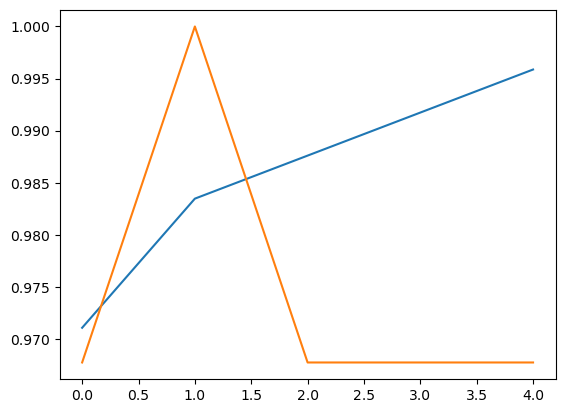

In [47]:
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validiation_accuracy')